# Poder de resolución de un sistema óptico

## Introducción

Hemos visto como la difraccion determina que la irradiancia en una pantalla situada tras una abertura, no tendra la distribucion espacial fijada por la sombra geometrica de dicha abertura. El haz se abre y presenta maximos y minimos en la pantalla. Esta observacion se puede interpretar aplicando el principio de Huygens-Fresnel, es decir, calculando la interferencia de las ondas secundarias emitidas por cada punto del frente de ondas que la abertura deja pasar. 

Tambien hemos visto anteriormente que en el caso particular de una abertura circular, la distribucion de irradiancia en la pantalla se conoce como mancha de Airy, caracterizada por un maximo central en donde se distribuye la mayor parte de la energia y lobulos laterales cada vez menos intensos. Debido a este perfil, el tamagno de la mancha de Airy se suele especificar dando el diametro (o radio) del primer anillo oscuro, o bien, el angulo subtendido con el eje optico por este minimo desde la abertura si se expresa el tamagno en unidades angulares.

Este valor del angulo que da la posicion del primer minimo de la mancha de Airy sigue la expresion, 

<div class="alert alert-block alert-success">
    

$$ \theta_1 = \frac{1.22 \lambda}{\Phi}$$

</div>

donde $\lambda$ es la longitud de onda que ilumina el sistema y $\Phi$ es el diametro de la abertura.

<center>
    
![Funcion de Airy](airydisk.jpg)

</center>
----------

Esta distribucion de irradiancia provocada por una abertura circular toma gran importancia al introducir los efectos de la difraccion en la formacion de la imagen de un sistema optico. Efectivamente, todo sistema optico posee una dimension transversal finita, normalmente dada por el tamaño de las lentes o diafragmas incluidos. Este tamaño finito provoca que el haz procedente de un objeto del cual se quiera formar su imagen sea cortado en su entrada al sistema, apareciendo por tanto los efectos de la difracción comentados en este tema. El resultado es que la predicción realizada por la Optica Geometrica para un sistema optico perfecto por la cual la imagen de un punto es un punto deja de tener validez por la difracción. Al incluir sus efectos, la imagen de un punto será una mancha de difracción. Por otro lado, y dado que la mayoria de las lentes y diafragmas utilizados tienen forma circular, esta mancha sera la mancha de Airy comentada anteriormente. 



## Limitación en la resolución de dos objetos puntuales cercanos

<center>

![poderfig](poderresoluciónfig.png)

</center>

Podemos comprender facilmente que, si la imagen de un punto no es otro punto debido a la difracción, sino que es una distribución espacial de irradiancia con una cierta extensión, las imágenes de dos puntos objetos cercanos pueden llegar a solaparse entre si en el plano imagen, resultando en una mancha un poco mas grande. De este modo, podemos llegar a no ser capaces de distinguir las imágenes de esos dos puntos cercanos. Dicho de otro modo, el hecho de que la difracción imponga un cierto tamaño en la imagen de un punto objeto dada por un sistema optico, limita la capacidad del sistema de resolver dos puntos objeto cercanos.


## Criterio de Rayleigh

Aunque distinguir entre dos imágenes superpuestas puede ser algo subjetivo, se ha desarrollado un criterio para discriminar si dos imágenes se encuentran lo suficientemente separadas entre sí para que podamos decir que el sistema resuelve esos dos puntos. Este criterio se denomina **Criterio de Rayleigh** y según el 

<div class-alert=info>
    
*dos imágenes se encuentran resueltas si, al menos, la separación entre los máximos de las manchas de Airy es igual al radio del primer mínimo*.

</div>

## Ángulo mínimo de resolución

Una magnitud útil para valorar el poder de resolución de un sistema optico es el *angulo mínimo de resolución*, entendido como el mínimo angulo que pueden subtender dos objetos puntuales, vistos desde mi sistema optico, de tal forma que sus imágenes esten resueltas según el criterio de Rayleigh. Es decir, este ángulo $\theta_{min}$ hara que las imágenes se encuentren separadas de tal forma que el maximo de una de las manchas de Airy (correspondiente a una de las imágenes), se encuentre en el primer mínimo de la otra (correspondiente a la imagen del otro punto objeto). Por tanto, 

$$\theta_{min} = \frac{1.22 \lambda}{D}$$

donde $D$ es el diametro de la lente o pupila que límite el haz de entrada al sistema optico. 

Las anteriores consideraciónes pueden tambien plantearse de la siguiente forma: Si llamamos $\theta$ al angulo que subtienden dos puntos objeto cualesquiera desde el sistema optico, estos puntos objeto seran resueltos por el sistema si, 

$$\theta \ge \theta_{min}$$


El siguiente codigo calcula las imágenes dadas por una lente de dos puntos objetos cercanos. La distancia entre dichos puntos, la longitud de onda, la focal de la lente o la distancia a la lente se pueden modificar. En la figura, se muestra un perfil de la irradiancia en el plano imagen junto a la referencia que marca la separación impuesta por el criterio de Rayleigh para que dos puntos esten resueltos. También se muestra a la derecha la imagen 2D de lo que observaríamos en la pantalla.

<ipython-input-1-cff41da0d279>:51: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax[1].pcolormesh(x,x,Icirctot,cmap='hot')


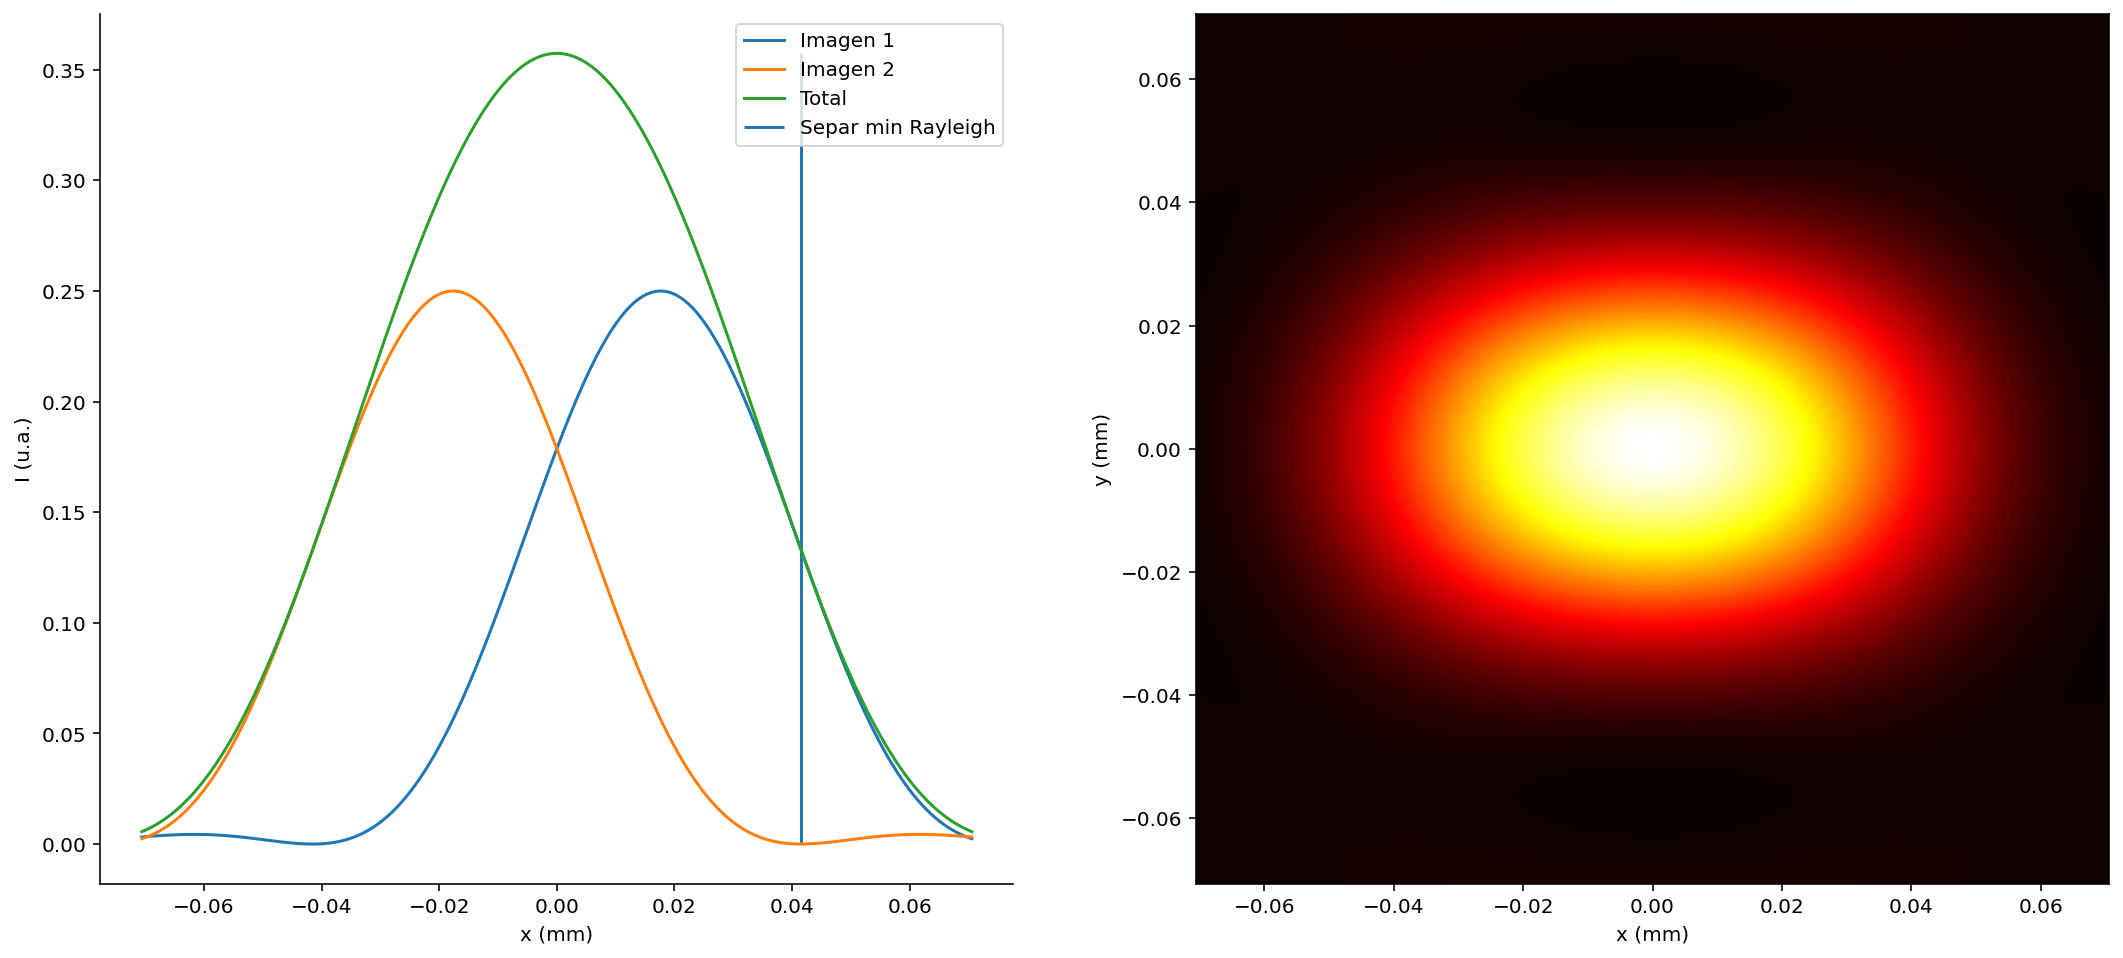

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.special import j1

#Parámetros
############
fprima = 300 # focal de la lente
Da = 4 # mm
Dobj = 2000 # distancia desde la lente a los dos puntos objetos
d =0.2 #separacion entre los puntos objetos
Lambda = 5.5e-4

################
# Calculos
###############
k = 2*np.pi/Lambda
theta = np.arctan(d/Dobj)
sprima = (-Dobj*fprima)/(-Dobj + fprima) # distancia lente-pantalla
x0 = sprima*(d/Dobj)
x = np.linspace(-2*x0,2*x0,350) # distancia al eje en la pantalla


#Corte en 1D
I0 = 1 #mW/cm^2
Icirc1 = I0*(j1(k*0.5*Da*(x-x0/2)/sprima)/(k*0.5*Da*(x-x0/2)/sprima))**2
Icirc2 = I0*(j1(k*0.5*Da*(x+x0/2)/sprima)/(k*0.5*Da*(x+x0/2)/sprima))**2
Icirc = Icirc1 + Icirc2
rayleigh = 1.22*sprima*Lambda/Da - x0/2
fig,ax = plt.subplots(1,2,figsize=(18,8),frameon=False)

ax[0].plot(x,Icirc1,label='Imagen 1')
ax[0].plot(x,Icirc2,label='Imagen 2')
ax[0].plot(x,Icirc,label='Total')
ax[0].vlines(rayleigh,0,np.amax(Icirc),label='Separ min Rayleigh')
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)

ax[0].legend()
ax[0].set_xlabel("x (mm)")
ax[0].set_ylabel("I (u.a.)");


#En 2D
[X,Y] = np.meshgrid(x,x)
R1 = np.sqrt((X+x0/2)**2 + Y**2)
R2 = np.sqrt((X-x0/2)**2 + Y**2)
Icirc1 =  I0*(j1(k*0.5*Da*R1/sprima)/(k*0.5*Da*R1/sprima))**2
Icirc2 =  I0*(j1(k*0.5*Da*R2/sprima)/(k*0.5*Da*R2/sprima))**2
Icirctot = Icirc1 + Icirc2
ax[1].pcolormesh(x,x,Icirctot,cmap='hot')
ax[1].set_xlabel('x (mm)')
ax[1].set_ylabel('y (mm)');

# Cuestiones

Modificar los parametros del codigo anterior, volviendo a ejecutar la celda para contestar a las siguientes cuestiones:

1. Modificar la separacion entre los puntos objetos para observar una situacion en la que los puntos no sean resueltos por la lente y otra en la que si lo sean.

2. Si partimos de una situacion en la que no se resuelvan dos puntos objetos, como tendriamos que modificar $\lambda$ para conseguir que si se resolvieran?

3. Podriamos conseguir pasar de una situacion en la que no se resuelvan dos puntos objeto a otra en la que si se resuelvan variando unicamente la focal de lente

4. Como cambiaria el codigo si en vez de una lente en aire consideraramos que detras de la lente se encuentra un medio con un cierto indice de refraccion?